## 3. Hypothesis Testing

In [6]:
# Import required modules
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [7]:
# Load the dataset
df = pd.read_csv("Data\winequality-red.csv")

<>:2: SyntaxWarning: invalid escape sequence '\w'
<>:2: SyntaxWarning: invalid escape sequence '\w'
C:\Users\Saian\AppData\Local\Temp\ipykernel_11624\1194014973.py:2: SyntaxWarning: invalid escape sequence '\w'
  df = pd.read_csv("Data\winequality-red.csv")


### 3.2. Testing whether mean alcohol content differs between high- and low-quality wines

In [8]:
# Define the two groups: high quality and low quality
# High quality is quality >= 6
high_quality = df[df['quality'] >= 6]['alcohol'].dropna()

# Low quality is quality <= 5
low_quality = df[df['quality'] <= 5]['alcohol'].dropna()

In [9]:
# Count how many in each group
nHighQuality = high_quality.count()
print(f"Entries in High Quality Group: {nHighQuality}")

nLowQuality = low_quality.count()
print(f"Entries in Low Quality Group: {nLowQuality}")

Entries in High Quality Group: 855
Entries in Low Quality Group: 744


Visually compare the difference in alchohol content between the two groups by using their respective box plots and histograms.

C:\Users\Saian\AppData\Local\Temp\ipykernel_11624\1600414057.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([high_quality, low_quality], labels=["High Quality", "Low Quality"])


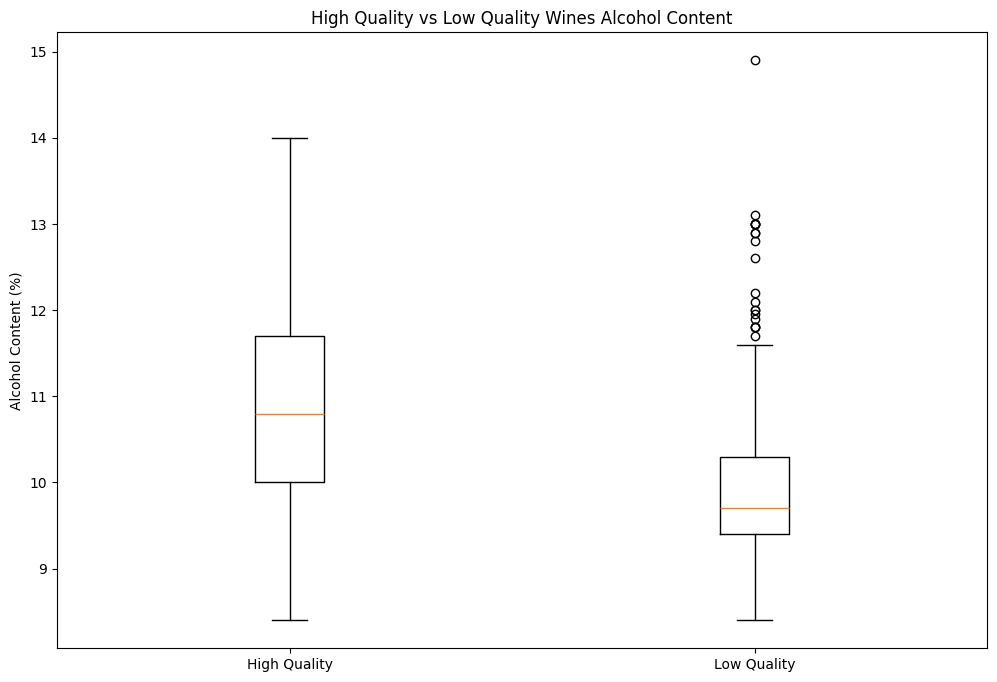

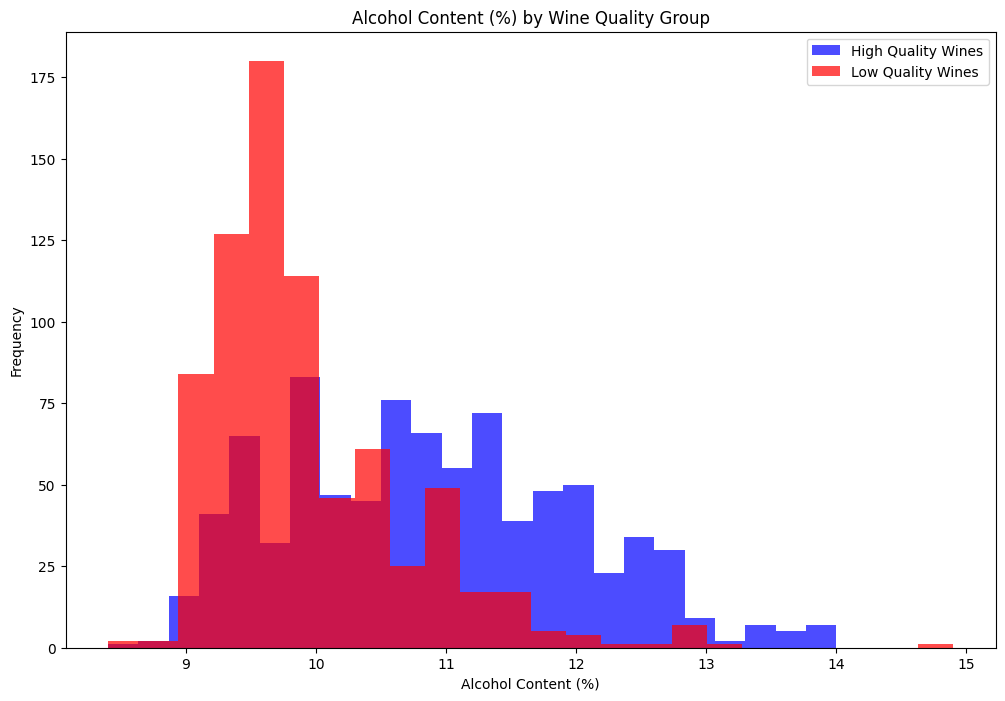

In [ ]:
# Box Plot
labels = np.array(["High Quality"]*nHighQuality + ["Low Quality"]*nLowQuality)
combinedGroups = np.concatenate([high_quality, low_quality])

# Draw the box plot
plt.figure(figsize=(12,8))
plt.boxplot([high_quality, low_quality], labels=["High Quality", "Low Quality"])
# plt.title("High Quality vs Low Quality Wines Alcohol Content")
plt.ylabel("Alcohol Content (%)")

# Histogram
plt.figure(figsize=(12,8))
plt.hist(high_quality, bins=24, alpha=0.7, label="High Quality Wines", color="blue")
plt.hist(low_quality, bins=24, alpha=0.7, label="Low Quality Wines", color="red")
# plt.title("Alcohol Content (%) by Wine Quality Group")
plt.xlabel("Alcohol Content (%)")
plt.ylabel("Frequency")
plt.legend()

Perform a Two-Sample t-test (independent).

In [11]:
t_stat, p_value = stats.ttest_ind(high_quality, low_quality, equal_var=True)

# Display the results
print("Two-Sample t-test (Alcohol Content between high and low quality wines)")
print("t_stat = ", t_stat)
print("p_value = ", p_value)

# Check against the significance level
alpha = 0.05

if p_value < alpha:
    print("\nConclusion: Reject the null hypothesis (H₀). There is a significant difference in alcohol content between high and low quality wines.")
else:
    print("\nConclusion: Fail to reject the null hypothesis (H₀). There is no significant difference in alcohol content between high and low quality wines.")

Two-Sample t-test (Alcohol Content between high and low quality wines)
t_stat =  19.292349918493183
p_value =  1.0239802418655636e-74

Conclusion: Reject the null hypothesis (H₀). There is a significant difference in alcohol content between high and low quality wines.


Perform a Power Analysis using the analytical approach.

In [12]:
from statsmodels.stats.power import TTestIndPower

# Instantiate TTestIndPower class
analysis = TTestIndPower()

# Anticipated difference
difference = 1.0

# Assumed standard deviation
std = 1.0

# Cohen's d: Effect Size = (difference / std)
effect_size = difference / std

# Set significance level and power
alpha = 0.05
power = 0.90

# Solve for sample size per group
sample_size = analysis.solve_power(effect_size=effect_size,
                                   alpha=alpha,
                                   power=power,
                                   alternative='two-sided')

# Display the result
print("Required sample size per group = ", sample_size)

#  Suppose we fix n per group, find the power
nFix = 20
my_power = analysis.solve_power(effect_size=effect_size,
                          alpha=alpha,
                          nobs1=nFix,
                          alternative='two-sided')

# Display the result
print(f"Power with n = {nFix} per group = {my_power:3f}")

Required sample size per group =  22.021089673603985
Power with n = 20 per group = 0.868953


In [13]:
import numpy as np
import scipy.stats as stats

# Compute statistics for each group
mean_high = np.mean(high_quality)
std_high = np.std(high_quality, ddof=1)  # Sample std (ddof=1)
n_high = len(high_quality)

mean_low = np.mean(low_quality)
std_low = np.std(low_quality, ddof=1)  # Sample std (ddof=1)
n_low = len(low_quality)

# Compute standard errors
SE_high = std_high / np.sqrt(n_high)
SE_low = std_low / np.sqrt(n_low)

# Compute degrees of freedom (pooled df)
df = n_high + n_low - 2

# Find the critical t-value for a 95% CI (two-tailed)
t_crit = stats.t.ppf(1 - 0.05/2, df)

# Compute confidence intervals
CI_high = (mean_high - t_crit * SE_high, mean_high + t_crit * SE_high)
CI_low = (mean_low - t_crit * SE_low, mean_low + t_crit * SE_low)

# Display results
print("95% Confidence Intervals:")
print(f"High-Quality Wines: Mean = {mean_high:.2f}, 95% CI = {CI_high}")
print(f"Low-Quality Wines: Mean = {mean_low:.2f}, 95% CI = {CI_low}")


95% Confidence Intervals:
High-Quality Wines: Mean = 10.86, 95% CI = (10.780831213602239, 10.929227265929923)
Low-Quality Wines: Mean = 9.93, 95% CI = (9.871970045588334, 9.980986943658976)
